# Imported Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
import sweetviz
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import scipy.stats as st
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [6]:
df=pd.read_csv(r"C:\Users\bhava\Downloads\fedex.csv")
df

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059.0,1100,1256,DL,1547,236.0,-1.0,ATL,JAC,1572,0.0
3604171,2008,6,19,4,555.0,600,738,DL,1548,98.0,-5.0,RSW,ATL,515,0.0
3604172,2008,6,19,4,821.0,827,1003,DL,1548,96.0,-6.0,ATL,IND,432,0.0
3604173,2008,6,19,4,718.0,735,852,DL,1551,77.0,-17.0,CAE,ATL,191,0.0


# Exploratory Data Analysis

## Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [9]:
viz = sweetviz.analyze(df)

In [10]:
viz.show_html('report.html')

In [11]:
df.nunique().sort_values(ascending =False)

Carrier_Num              7340
Actual_Shipment_Time     1439
Distance                 1423
Planned_Delivery_Time    1353
Planned_Shipment_Time    1188
Shipment_Delay            997
Planned_TimeofTravel      499
Destination               299
Source                    297
DayofMonth                 31
Carrier_Name               20
DayOfWeek                   7
Month                       6
Delivery_Status             2
Year                        1
dtype: int64

In [12]:
df["Destination"].unique()

array(['TPA', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'FLL',
       'PBI', 'RSW', 'HOU', 'BHM', 'BNA', 'IND', 'ORF', 'PHL', 'ABQ',
       'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH',
       'DEN', 'ELP', 'GEG', 'IAD', 'ISP', 'LAX', 'LBB', 'LIT', 'MAF',
       'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD',
       'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC',
       'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'JAN', 'HRL',
       'CRP', 'EWR', 'IAH', 'XNA', 'DCA', 'GSO', 'ROC', 'MYR', 'SYR',
       'ATL', 'SAV', 'RIC', 'COS', 'FAT', 'MRY', 'LGB', 'BFL', 'EUG',
       'ICT', 'MSN', 'CAE', 'DAY', 'BTR', 'TLH', 'DFW', 'LFT', 'PWM',
       'SHV', 'MKE', 'CHS', 'CRW', 'HSV', 'TYS', 'MTJ', 'MGM', 'MFE',
       'MSP', 'GSP', 'GRR', 'MEM', 'BTV', 'CLT', 'BRO', 'CVG', 'LGA',
       'VPS', 'LEX', 'BPT', 'PNS', 'ORD', 'ABE', 'LRD', 'BGR', 'GRK',
       'SRQ', 'LCH', 'AEX', 'AVL', 'GPT', 'MLU', 'MOB', 'BOS', 'DSM',
       'CHA', 'CLL',

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df["Delivery_Status"].unique()

array([ 0.,  1., nan])

In [15]:
df.loc[pd.isna(df["Delivery_Status"]), ["Delivery_Status"]]

,Delivery_Status
178,NaN
373,NaN
399,NaN
401,NaN
415,NaN
...,...
3603242,NaN
3603243,NaN
3603246,NaN
3603849,NaN


In [16]:
df = df.dropna(subset=["Delivery_Status"])

In [17]:
df["Delivery_Status"]=df["Delivery_Status"].astype("int")

In [18]:
def convert_to_minutes(time):
    hours = time//100
    minutes = time%100
    return hours * 60 + minutes

In [19]:
df['Actual_Shipment_Time'] = df['Actual_Shipment_Time'].apply(convert_to_minutes)

In [20]:
df['Planned_Delivery_Time'] = df['Planned_Delivery_Time'].apply(convert_to_minutes)

In [21]:
df['Planned_Shipment_Time'] = df['Planned_Shipment_Time'].apply(convert_to_minutes)

In [22]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
Actual_Shipment_Time       0
Planned_Shipment_Time      0
Planned_Delivery_Time      0
Carrier_Name               0
Carrier_Num                0
Planned_TimeofTravel     406
Shipment_Delay             0
Source                     0
Destination                0
Distance                   0
Delivery_Status            0
dtype: int64

## Data Visualization

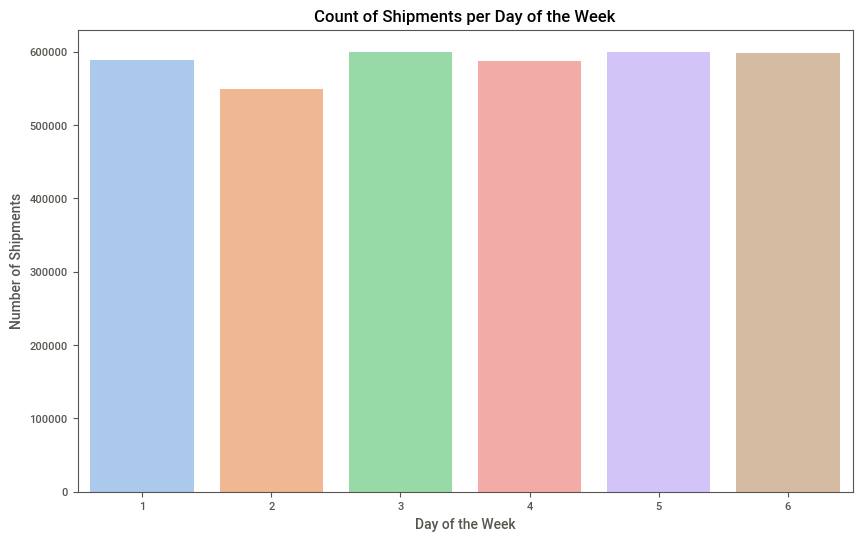

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='pastel')
plt.title('Count of Shipments per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Shipments')
plt.show()


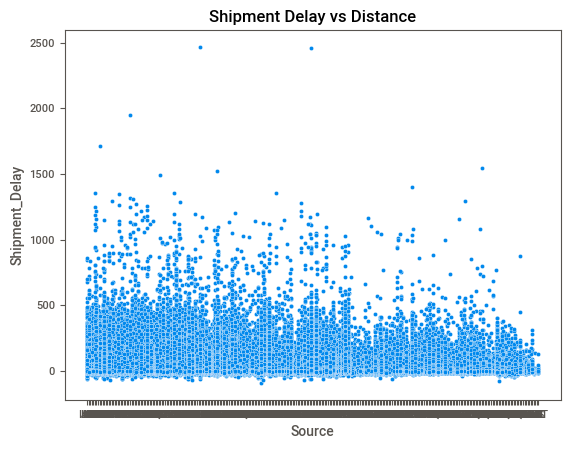

In [24]:
sns.scatterplot(x='Source', y='Shipment_Delay', data=df)
plt.title('Shipment Delay vs Distance')
plt.show()

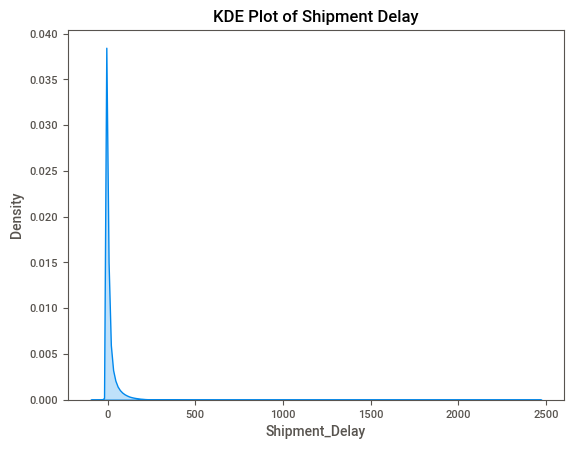

In [25]:
sns.kdeplot(df['Shipment_Delay'], shade=True)
plt.title('KDE Plot of Shipment Delay')
plt.show()

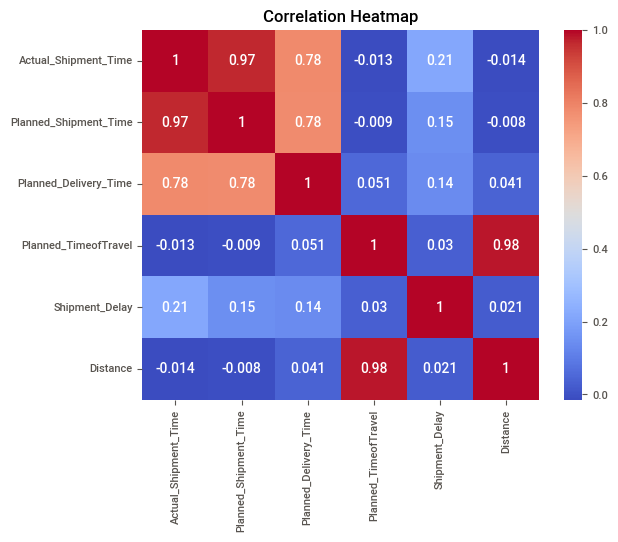

In [26]:
correlation_matrix = df[['Actual_Shipment_Time', 'Planned_Shipment_Time', 'Planned_Delivery_Time',
                           'Planned_TimeofTravel', 'Shipment_Delay', 'Distance']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

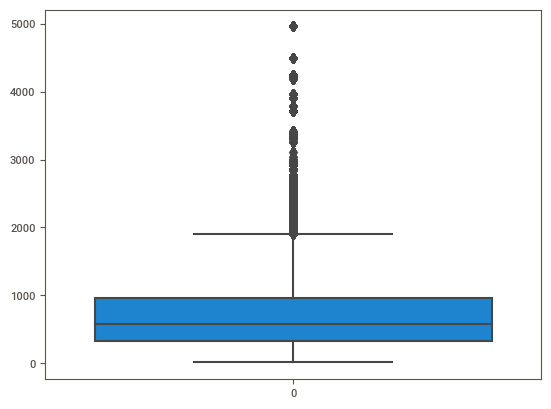

In [27]:
sns.boxplot(df['Distance'])

In [28]:
def outlier_(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [29]:
sum(outlier_(df['Distance']))

187027

In [30]:
from feature_engine.outliers import Winsorizer

winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Distance'])
df['Distance']=winsor.fit_transform(df[['Distance']])
sum(outlier_(df['Distance']))

0

<Axes: >

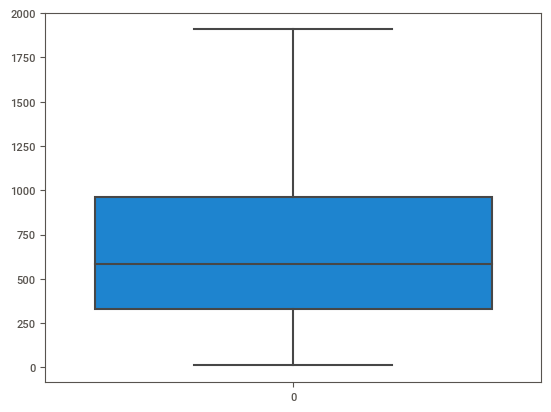

In [31]:
sns.boxplot(df['Distance'])

# Declaring feature variables

In [32]:
continuous=["Shipment_Delay","Distance","Actual_Shipment_Time","Planned_Shipment_Time","Planned_Delivery_Time","Planned_TimeofTravel"]
nominal=["Carrier_Name","Source","Destination"]
ordinal=["Year","Month","DayofMonth",'DayOfWeek']

# Declaring the target variable

In [33]:
df[["Delivery_Status"]]

,Delivery_Status
0,0
1,1
2,0
3,0
4,1
...,...
3604170,0
3604171,0
3604172,0
3604173,0


# Pipeline creation for feature preprocessing

In [34]:
cont_transform = Pipeline([("Mean Imputation",SimpleImputer(strategy='mean')),
         ("Standard Scaler",StandardScaler(with_std=False))])

nomi_transform = Pipeline([("Mode Imputation",SimpleImputer(strategy='most_frequent')),
         ("One Hot Encoding",OneHotEncoder(handle_unknown='ignore'))
         ])
ord_transform = Pipeline([("Mode Imputation",SimpleImputer(strategy='most_frequent')),
        ("Ordinal Encoding",OrdinalEncoder())])

preprocess = ColumnTransformer([("Continuation Transformation",cont_transform,continuous),
                  ("Nominal Transformation",nomi_transform,nominal),
                ("Ordinal Encoding",ord_transform,ordinal)],remainder="passthrough")
                  
preprocess


ColumnTransformer(remainder='passthrough',
                  transformers=[('Continuation Transformation',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Standard Scaler',
                                                  StandardScaler(with_std=False))]),
                                 ['Shipment_Delay', 'Distance',
                                  'Actual_Shipment_Time',
                                  'Planned_Shipment_Time',
                                  'Planned_Delivery_Time',
                                  'Planned_TimeofTravel']),
                                ('Nominal Transformation',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('One Hot Encoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Carrier_Name', 'Source', 'Destination']),
                                ('Ordinal Encoding',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Ordinal Encoding',
                                                  OrdinalEncoder())]),
                                 ['Year', 'Month', 'DayofMonth', 'DayOfWeek'])])

# Spliting data into separate training and test set

In [38]:
X= df.drop(['Delivery_Status'],axis=1)
y=df[["Delivery_Status"]]

# Model training

##  LogisticRegression Alogrithm

In [39]:
model = Pipeline([("Data Prepocessing",preprocess),
         ("Alogrithm",(LogisticRegression()))])
model

Pipeline(steps=[('Data Prepocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Continuation Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler(with_std=False))]),
                                                  ['Shipment_Delay', 'Distance',
                                                   'Actual_Shipment_Time',
                                                   'Planned_Shipment_Time',
                                                   'Planned_Delivery_Time',
                                                   'Planned_TimeofTravel...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Carrier_Name', 'Source',
                                                   'Destination']),
                                                 ('Ordinal Encoding',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder())]),
                                                  ['Year', 'Month',
                                                   'DayofMonth',
                                                   'DayOfWeek'])])),
                ('Alogrithm', LogisticRegression())])

## LogisticRegression model evaluation and  Predicting results 


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    560828
           1       0.96      0.99      0.97    143686

    accuracy                           0.99    704514
   macro avg       0.98      0.99      0.98    704514
weighted avg       0.99      0.99      0.99    704514



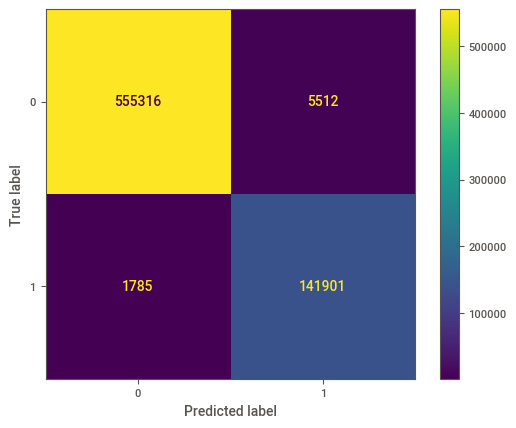

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
plt=ConfusionMatrixDisplay(cm)
plt.plot()


# ROC CURVE 

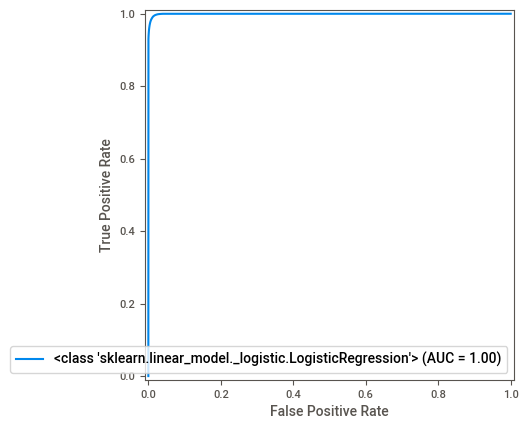

In [44]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

model.fit(X_train,y_train)
y_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thr= roc_curve(y_test,y_prob)

area = auc(fpr,tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area, estimator_name=LogisticRegression)
curve.plot()

In [45]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,1203.0,1195,1345,WN,335,150.0,8.0,IAD,TPA,810,0
1,2008,1,3,4,474.0,455,600,WN,3231,145.0,19.0,IAD,TPA,810,1
2,2008,1,3,4,388.0,380,470,WN,448,90.0,8.0,IND,BWI,515,0
3,2008,1,3,4,566.0,570,660,WN,1746,90.0,-4.0,IND,BWI,515,0
4,2008,1,3,4,1109.0,1075,1165,WN,3920,90.0,34.0,IND,BWI,515,1


# Pickiling the model for Deployment

In [46]:
import pickle

In [47]:
pickle.dump(model,open("fedex.pkl","wb"))

In [48]:
pickle.load(open("fedex.pkl","rb"))

Pipeline(steps=[('Data Prepocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Continuation Transformation',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scaler',
                                                                   StandardScaler(with_std=False))]),
                                                  ['Shipment_Delay', 'Distance',
                                                   'Actual_Shipment_Time',
                                                   'Planned_Shipment_Time',
                                                   'Planned_Delivery_Time',
                                                   'Planned_TimeofTravel...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Carrier_Name', 'Source',
                                                   'Destination']),
                                                 ('Ordinal Encoding',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder())]),
                                                  ['Year', 'Month',
                                                   'DayofMonth',
                                                   'DayOfWeek'])])),
                ('Alogrithm', LogisticRegression())])